<a href="https://colab.research.google.com/github/JustynaMatewka/_Flower_Match_/blob/main/_Flower_match_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project \__Flower_match\__, flower species classification from image**

## Import and unzip database from kaggle.com

In [1]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle

In [3]:
! chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d bogdancretu/flower299

100% 1.85G/1.85G [01:29<00:00, 29.6MB/s]
100% 1.85G/1.85G [01:29<00:00, 22.2MB/s]


In [5]:
!unzip "/content/flower299.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Flowers299/WinterJasmine/66bfe36a4d.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6715063451.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6743b0627d.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/69796fa61a.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/69fcea24cd.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6a12651555.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6a175b1660.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6a3ddee1ec.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6a78195245.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6bdd6c1804.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6c16c5ab4b.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6d19f622bf.jpg  
  inflating: /content/dataset/Flowers299/WinterJasmine/6d232af6e3.jpg  
  inflating: 

## Extensions

In [19]:
import tensorflow as tf ### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np  ### math computations
import matplotlib.pyplot as plt ### plotting bar chart
import glob
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, Dense, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Rescaling, Resizing
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import L2, L1

# Needed paths and names

In [10]:
directory = "/content/dataset/Flowers299"

result = ("/content/dataset/Flowers299/*")
CLASS_NAMES = []
for x in glob.glob(result):
   CLASS_NAMES.append(x.split("/")[-1])
print(CLASS_NAMES)

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IMAGE_SIZE": 256,
}

['KaffirLily', 'Knautia', 'Euphorbia', 'Tritoniacrocata', 'WhirlingButterflies', 'Trachelium', 'Potentilla', 'Brassica', 'Hollyhock', 'Freesia', 'Hydrangea', 'Winterberry', 'Anemone', 'GerberaFlower', 'Hellebore', 'Magnolia', 'Speedwell', 'Pelargonium', 'BlanketFlower', 'Clematis', 'Kalmia', 'IpomoeaLobata', 'WinterJasmine', 'FrenchMarigold', 'Viola', 'Viburnum', 'Mimosa', 'TeaRose', 'Lily', 'ArmeriaMaritima', 'Dill', 'Periwinkle', 'Camellia', 'NewZealandTeaTree', 'Penstemon', 'Scaevola', 'Tithonia', 'Aconite', 'Statice', 'BlazingStar', 'Zenobia', 'Daisy', 'UvaUrsi', 'Guzmania', 'JacobтАЩsLadder', 'JohnnyJumpUp', 'Weigela', 'CallaLily', 'Nemesia', 'DutchIris', 'Valerian', 'Celosia', 'Tuberose', 'Clover', 'PersianButtercup', 'Ixia', 'Roses', 'KangarooPaw', 'Hyacinth', 'Epimedium', 'Ursinia', 'YellowArchangel', 'Feverfew', 'Clarkia', 'Wandflower', 'Foxglove', 'TobaccoPlant', 'Iris', 'Helenium', 'CoralBells', 'Starflower', 'Watsonia', 'PowderPuff', 'Bellflower', 'Delphinium', 'Hebe', 'Lav

# Dataset Loading

In [11]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    shuffle=True,
    seed=99,  # Zawsze będzie tak samo tasował bazę
    validation_split=0.2, # Zostawia 20% bazy na walidację
    subset="training",
    # interpolation='bilinear',
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True
)

Found 115944 files belonging to 299 classes.
Using 92756 files for training.


In [12]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    shuffle=True,
    seed=99,
    validation_split=0.2,
    subset="validation",
    # interpolation='bilinear',
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True
)

Found 115944 files belonging to 299 classes.
Using 23188 files for validation.


# Dataset Visualization

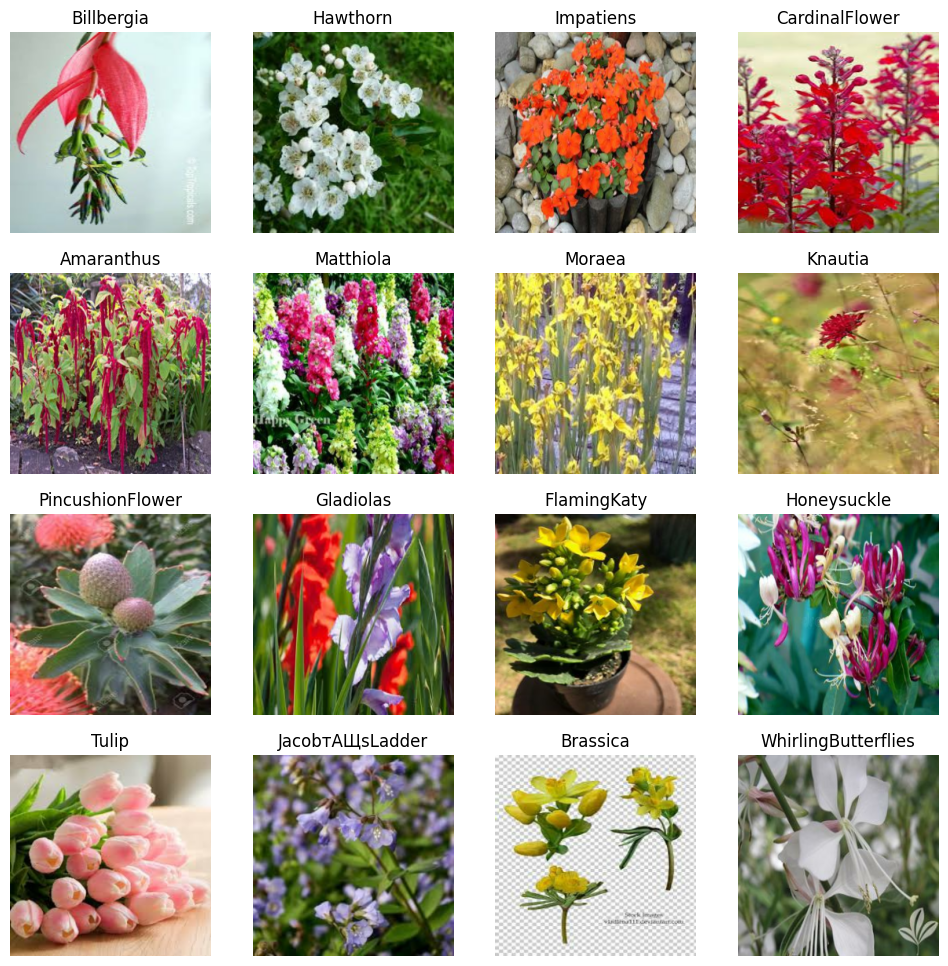

In [16]:
plt.figure(figsize = (12,12))

for image, labels in train_dataset.take(1):
  for x in range(16):
    ax = plt.subplot(4, 4, x+1)
    plt.imshow(image[x]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[x], axis = 0).numpy()])
    plt.axis("off")
  break;

# Dataset Preparation

In [17]:
training_dataset = (
    train_dataset.prefetch(tf.data.AUTOTUNE)
)

In [18]:
validation_dataset = (
    val_dataset.prefetch(tf.data.AUTOTUNE)
)

In [21]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    Rescaling(1./255),
])

# Modeling

# **19:54:00**